In [1]:
import zipfile as zf
files = zf.ZipFile("archive.zip", 'r')
files.extractall('directory to extract')
files.close()

In [2]:
import pandas as pd
import numpy as np
import os
from pathlib import Path
import glob
import os
import matplotlib.pyplot as plt

In [3]:
# importing libraries
import numpy as np # For numerical computation
import pandas as pd # Data manipulation
import seaborn as sns # plotting
import scipy.io # reading matlab files in python
from scipy import signal #signal processing
from scipy.fftpack import fft, dct #signal processing

from sklearn.linear_model import LinearRegression #linear regression model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, train_test_split # cross validation split
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt # For plotting graphs(Visualization)

import os # system-wide functions


In [4]:
sample_file = scipy.io.loadmat(f'archive/part_1.mat')
print(f'sample_file Data type: {type(sample_file)}')
print(f'sample_file keys:\n{sample_file.keys()}')

sample_file Data type: <class 'dict'>
sample_file keys:
dict_keys(['__header__', '__version__', '__globals__', 'p'])


In [5]:
# Loading a sample .mat file to understand the data dimensions
test_sample = scipy.io.loadmat(f'archive/part_1.mat')['p']
print(f'test_sample Data type: {type(test_sample)}')
print(f'test_sample shape/dimensions: {test_sample.shape}')

test_sample Data type: <class 'numpy.ndarray'>
test_sample shape/dimensions: (1, 1000)


In [6]:
print(f"Total Samples: {len(test_sample[0])}")
print(f"Number of readings in each sample(column): {len(test_sample[0][0])}")
print(f"Number of samples in each reading(ECG): {len(test_sample[0][0][2])}")

temp_mat = test_sample[0, 999]
temp_length = temp_mat.shape[1]
sample_size = 125


print(temp_length)
print((int)(temp_length/sample_size))

Total Samples: 1000
Number of readings in each sample(column): 3
Number of samples in each reading(ECG): 61000
9000
72


In [7]:
temp_mat.shape

(3, 9000)

In [8]:
sample_size = 125
ppg = []
for i in range(1000):
    temp_mat = test_sample[0, i]
    temp_length = temp_mat.shape[1]
    for j in range((int)(temp_length/sample_size)):
        temp_ppg = temp_mat[0, j*sample_size:(j+1)*sample_size]
        ppg.append(temp_ppg)

In [9]:
ecg = []
bp = []
size = 125 #sample size

for i in range(1000):
    temp_mat = test_sample[0, i]
    temp_length = temp_mat.shape[1]
    for j in range((int)(temp_length/sample_size)):
        temp_ecg = temp_mat[2, j*size:(j+1)*size]
        temp_bp = temp_mat[1, j*size:(j+1)*size]
        ecg.append(temp_ecg)
        bp.append(temp_bp)

In [10]:
for i in range(2,12):
  sample_file = scipy.io.loadmat(f'archive/part_'+str(i)+'.mat')
  print(f'sample_file Data type: {type(sample_file)}')
  print(f'sample_file keys:\n{sample_file.keys()}')
  # Loading a sample .mat file to understand the data dimensions
  test_sample = scipy.io.loadmat(f'archive/part_'+str(i)+'.mat')['p']
  print(f'test_sample Data type: {type(test_sample)}')
  print(f'test_sample shape/dimensions: {test_sample.shape}')
  print(f"Total Samples: {len(test_sample[0])}")
  print(f"Number of readings in each sample(column): {len(test_sample[0][0])}")
  print(f"Number of samples in each reading(ECG): {len(test_sample[0][0][2])}")

  temp_mat = test_sample[0, 999]
  temp_length = temp_mat.shape[1]
  sample_size = 125


  print(temp_length)
  print((int)(temp_length/sample_size))
  for i in range(1000):
      temp_mat = test_sample[0, i]
      temp_length = temp_mat.shape[1]
      for j in range((int)(temp_length/sample_size)):
          temp_ppg = temp_mat[0, j*sample_size:(j+1)*sample_size]
          ppg.append(temp_ppg)
  for i in range(1000):
      temp_mat = test_sample[0, i]
      temp_length = temp_mat.shape[1]
      for j in range((int)(temp_length/sample_size)):
          temp_ecg = temp_mat[2, j*size:(j+1)*size]
          temp_bp = temp_mat[1, j*size:(j+1)*size]
          ecg.append(temp_ecg)
          bp.append(temp_bp)


sample_file Data type: <class 'dict'>
sample_file keys:
dict_keys(['__header__', '__version__', '__globals__', 'p'])
test_sample Data type: <class 'numpy.ndarray'>
test_sample shape/dimensions: (1, 1000)
Total Samples: 1000
Number of readings in each sample(column): 3
Number of samples in each reading(ECG): 6000
61000
488
sample_file Data type: <class 'dict'>
sample_file keys:
dict_keys(['__header__', '__version__', '__globals__', 'p'])
test_sample Data type: <class 'numpy.ndarray'>
test_sample shape/dimensions: (1, 1000)
Total Samples: 1000
Number of readings in each sample(column): 3
Number of samples in each reading(ECG): 65000
64000
512
sample_file Data type: <class 'dict'>
sample_file keys:
dict_keys(['__header__', '__version__', '__globals__', 'p'])
test_sample Data type: <class 'numpy.ndarray'>
test_sample shape/dimensions: (1, 1000)
Total Samples: 1000
Number of readings in each sample(column): 3
Number of samples in each reading(ECG): 57000
1000
8
sample_file Data type: <class

In [11]:
# Reshaping the ecg, ppg and bp signal data into column vectors
ppg, ecg, bp = np.array(ppg).reshape(-1,1), np.array(ecg).reshape(-1,1), np.array(bp).reshape(-1,1)
print(f'PPG_shape: {ppg.shape}\n ECG_shape: {ecg.shape}\n BP_shape: {bp.shape}')

PPG_shape: (308989000, 1)
 ECG_shape: (308989000, 1)
 BP_shape: (308989000, 1)


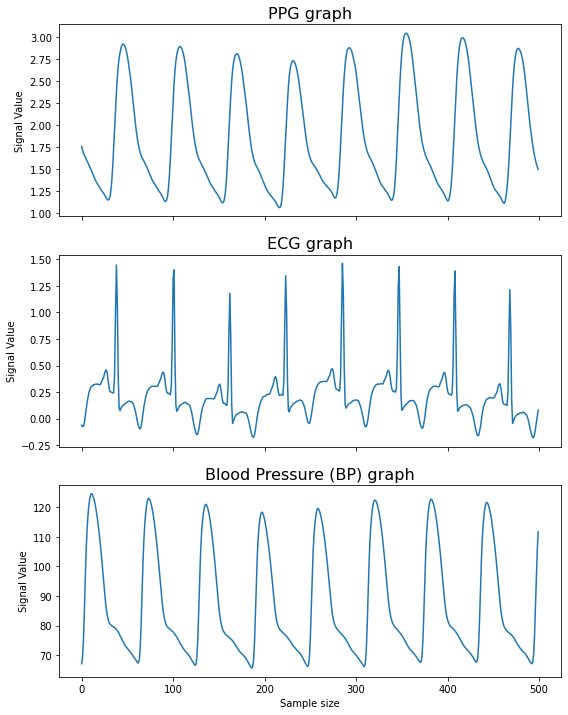

In [12]:
##plotting sample ppg, ecg and bp signals
##using a sample size of 500
fig, ax = plt.subplots(3,1, figsize=(9,12), sharex=True)

ax[0].set_title('PPG graph', fontsize=16)
ax[0].set_ylabel('Signal Value')
ax[0].plot(ppg[:500])

ax[1].set_title('ECG graph', fontsize=16)
ax[1].set_ylabel('Signal Value')
ax[1].plot(ecg[:500])

ax[2].set_title('Blood Pressure (BP) graph', fontsize=16)
ax[2].set_ylabel('Signal Value')
ax[2].set_xlabel('Sample size')
ax[2].plot(bp[:500])

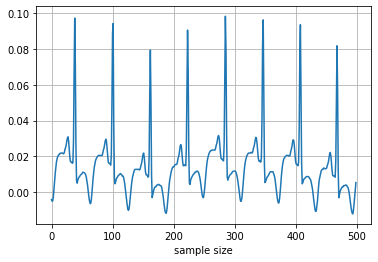

In [13]:
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


def run():
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.signal import freqz

    # Sample rate and desired cutoff frequencies (in Hz).
    fs = 500.0
    lowcut = 0.1
    highcut = 50.0
    y = butter_bandpass_filter(ecg, lowcut, highcut, fs, order=2)
    plt.plot(y[:500])
    plt.xlabel('sample size')
    plt.grid(True)

    plt.show()


run()

In [14]:
fs = 500.0
lowcut = 0.1
highcut = 50.0
ecg_new=butter_bandpass_filter(ecg, lowcut, highcut, fs, order=2)

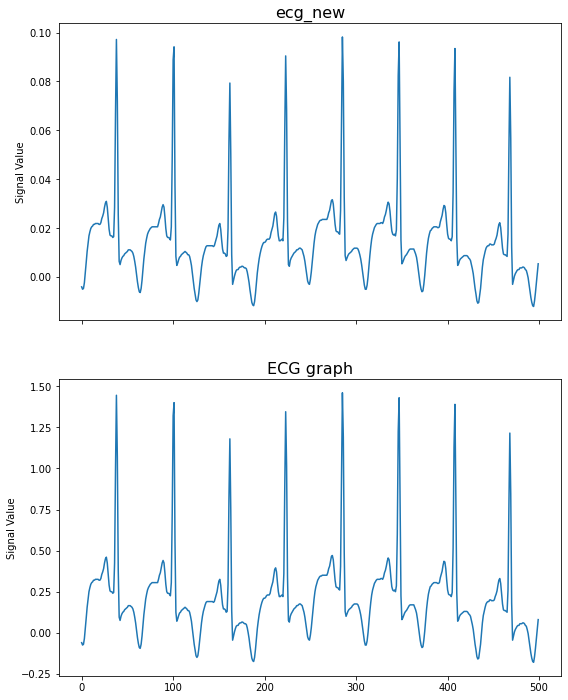

In [15]:
fig, ax = plt.subplots(2,1, figsize=(9,12), sharex=True)

ax[0].set_title('ecg_new', fontsize=16)
ax[0].set_ylabel('Signal Value')
ax[0].plot(ecg_new[:500])

ax[1].set_title('ECG graph', fontsize=16)
ax[1].set_ylabel('Signal Value')
ax[1].plot(ecg[:500])

In [16]:
pip install neurokit2

Note: you may need to restart the kernel to use updated packages.


In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.signal
import scipy.stats
import neurokit2 as nk

In [18]:
ecg_new.shape

(308989000, 1)

In [19]:
ecg_new=ecg_new.reshape(len(ecg_new))

In [20]:
bp=bp.reshape(len(bp))

In [21]:
ecg_new.shape

(308989000,)

In [22]:
bp.shape

(308989000,)

In [23]:
_, rpeaks = nk.ecg_peaks(ecg_new, sampling_rate=50)

In [24]:
rpeaks

{'ECG_R_Peaks': array([       38,       101,       162, ..., 159169498, 159169561,
        159169625]),
 'sampling_rate': 50}

In [25]:
len(rpeaks.values())

2

In [26]:
a=[]
for i in rpeaks.values():
  a.append(i)

In [27]:
a

[array([       38,       101,       162, ..., 159169498, 159169561,
        159169625]),
 50]

In [28]:
peak=[]
peak=a[0]

In [29]:
peak

array([       38,       101,       162, ..., 159169498, 159169561,
       159169625])

In [30]:
len(peak)

2066605

In [31]:
ecg_new.shape

(308989000,)

In [32]:
all_peaks=[]
corr_bp=[]
i=0
while i+3<len(peak):
  j=peak[i]
  k=peak[i+3]
  temp=ecg_new[j:k+1]
  b=bp[j:k+1]
  all_peaks.append(temp)
  corr_bp.append(b)
  i+=4


In [33]:
len(all_peaks)

516651

In [34]:
len(corr_bp)

516651

In [35]:
new_data=np.array(all_peaks)

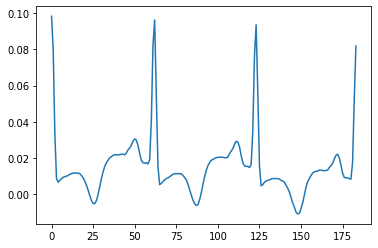

In [36]:
plt.plot(all_peaks[1])

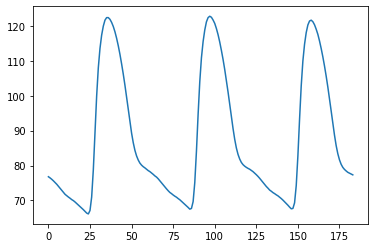

In [37]:
plt.plot(corr_bp[1])

In [38]:
from scipy import signal
from scipy.fft import fft, fftfreq, fftshift
import scipy.fft
f=scipy.signal.resample(all_peaks[1], 120)
b=scipy.signal.resample(corr_bp[1], 120)


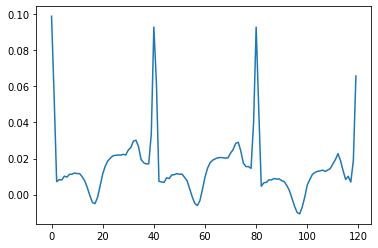

In [39]:
plt.plot(f)

In [40]:
f_peak=[]
f_bp=[]
for i in range(len(all_peaks)):
    f=scipy.signal.resample(all_peaks[i], 120)
    b=scipy.signal.resample(corr_bp[i], 120)
    f_peak.append(f);
    f_bp.append(b)


In [41]:
f_peak=np.array(f_peak)
f_bp=np.array(f_bp)

In [42]:
f_peak.shape

(516651, 120)

In [43]:
f_bp.shape

(516651, 120)

In [44]:
bp=[]
ecg=[]
Map=[]
sbp=[]
dbp=[]

In [45]:
ecga=[]  #Normal
ecgb=[]  # perhyper
ecgc=[]  #hyper
sbpa=[]
sbpb=[]
sbpc=[]
dbpa=[]
dbpb=[]
dbpc=[]

for i in range(len(f_bp)):
  sbp=max(f_bp[i])
  dbp=min(f_bp[i])
  if (sbp <= 90 or dbp <= 60):
    ecga.append(f_peak[i])
    sbpa.append(sbp)
    dbpa.append(dbp)
  if ((sbp >= 90 and sbp < 120) and (dbp >= 60 and dbp < 79)):
    ecga.append(f_peak[i])
    sbpa.append(sbp)
    dbpa.append(dbp)
  if ((sbp >= 120 and sbp < 140) or (dbp >= 80 and dbp < 90)):
    ecgb.append(f_peak[i])
    sbpb.append(sbp)
    dbpb.append(dbp)
  if ((sbp >= 140 and sbp < 160) or (dbp >= 90 and dbp < 100)):
    ecgc.append(f_peak[i])
    sbpc.append(sbp)
    dbpc.append(dbp)
  if (sbp >= 160 or dbp >= 100):
    ecgc.append(f_peak[i])
    sbpc.append(sbp)
    dbpc.append(dbp)
  if (sbp >= 140 and dbp < 90):
    ecgc.append(f_peak[i])
    sbpc.append(sbp)
    dbpc.append(dbp)
  if (sbp >= 180 or dbp >= 110):
    ecgc.append(f_peak[i])
    sbpc.append(sbp)
    dbpc.append(dbp)

In [46]:
ecga=np.array(ecga)  #Normal
ecgb=np.array(ecgb)   # perhyper
ecgc=np.array(ecgc)   #hyper
sbpa=np.array(sbpa) 
sbpb=np.array(sbpb) 
sbpc=np.array(sbpc) 
dbpa=np.array(dbpa) 
dbpb=np.array(dbpb) 
dbpc=np.array(dbpc) 

In [47]:
from sklearn.model_selection import train_test_split # cross validation split
from sklearn.metrics import mean_squared_error

In [48]:
from sklearn.metrics import mean_absolute_error

In [49]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers

In [50]:
def rmse(y_true, y_pred):
    """Computes the Root Mean Squared Error (RMSE)."""
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [51]:
def Model(input_dim, activation, num_class):
    model = Sequential()

    model.add(Dense(1024, input_dim = input_dim))
    model.add(Activation(activation))
    model.add(Dropout(0.5))

    model.add(Dense(512)) 
    model.add(Activation(activation))
    model.add(Dropout(0.5))

    model.add(Dense(64))    
    model.add(Activation(activation))
    model.add(Dropout(0.25))

    model.add(Dense(num_class))    
    model.add(Activation('linear'))
    
    model.compile(loss='Huber',
                  optimizer=optimizers.Adam(lr = 0.001),
                  metrics=['MeanAbsoluteError']
                 )
    return model

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ecga,sbpa, test_size=0.33)

In [56]:
input_dim = X_train.shape[1]
activation = 'relu'
classes = 1
model = Model(input_dim=input_dim, activation=activation, num_class=classes)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1024)              123904    
                                                                 
 activation_4 (Activation)   (None, 1024)              0         
                                                                 
 dropout_3 (Dropout)         (None, 1024)              0         
                                                                 
 dense_5 (Dense)             (None, 512)               524800    
                                                                 
 activation_5 (Activation)   (None, 512)               0         
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 64)               

In [57]:
history = model.fit(X_train, # using the first 1million rows for speed.
                    y_train.squeeze(),
                    epochs=100,
                    batch_size=128,
                    verbose = 1
                   )

Epoch 1/100
1288/1288 [==============================] - 10s 7ms/step - loss: 18.4981 - mean_absolute_error: 18.9918
Epoch 2/100
1288/1288 [==============================] - 10s 8ms/step - loss: 16.1640 - mean_absolute_error: 16.6573
Epoch 3/100
1288/1288 [==============================] - 10s 7ms/step - loss: 16.0206 - mean_absolute_error: 16.5138
Epoch 4/100
1288/1288 [==============================] - 10s 8ms/step - loss: 15.9520 - mean_absolute_error: 16.4453
Epoch 5/100
1288/1288 [==============================] - 10s 8ms/step - loss: 15.7686 - mean_absolute_error: 16.2616
Epoch 6/100
1288/1288 [==============================] - 10s 7ms/step - loss: 15.6310 - mean_absolute_error: 16.1241
Epoch 7/100
1288/1288 [==============================] - 10s 7ms/step - loss: 15.6044 - mean_absolute_error: 16.0975
Epoch 8/100
1288/1288 [==============================] - 10s 7ms/step - loss: 15.4522 - mean_absolute_error: 15.9450
Epoch 9/100
1288/1288 [==============================] - 10s 7ms

In [58]:
#Predicting on the test set using the nn(neural network) model
val_predictions = model.predict(X_test)
error = rmse(y_test, val_predictions)
print(f'Neural Net RMSE: {error}')

2537/2537 [==============================] - 9s 2ms/step
Neural Net RMSE: 12.465272120081679


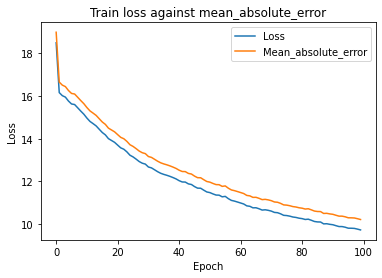

In [59]:
plt.title('Train loss against mean_absolute_error')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.plot(history.history['loss'])
plt.plot(history.history['mean_absolute_error'])
plt.legend(['Loss', 'Mean_absolute_error'])

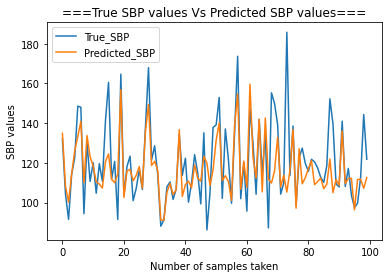

In [62]:
# Visualize predicted BP and the True BP
plt.title("===True SBP values Vs Predicted SBP values===")
plt.xlabel('Number of samples taken')
plt.ylabel('SBP values')
plt.plot(y_test[:100]) #only plotting 100 samples
plt.plot(val_predictions[:100])
plt.legend(['True_SBP', 'Predicted_SBP'])

#DBP



In [63]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(ecga,dbpa, test_size=0.33)

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ecga,dbpa, test_size=0.33)

In [65]:
input_dim = X_train.shape[1]
activation = 'relu'
classes = 1
model = Model(input_dim=input_dim, activation=activation, num_class=classes)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1024)              123904    
                                                                 
 activation_8 (Activation)   (None, 1024)              0         
                                                                 
 dropout_6 (Dropout)         (None, 1024)              0         
                                                                 
 dense_9 (Dense)             (None, 512)               524800    
                                                                 
 activation_9 (Activation)   (None, 512)               0         
                                                                 
 dropout_7 (Dropout)         (None, 512)               0         
                                                                 
 dense_10 (Dense)            (None, 64)               

In [66]:
history = model.fit(X_train, # using the first 1million rows for speed.
                    y_train.squeeze(),
                    epochs=100,
                    batch_size=128,
                    verbose = 1
                   )

Epoch 1/100
1288/1288 [==============================] - 10s 7ms/step - loss: 7.6239 - mean_absolute_error: 8.1089
Epoch 2/100
1288/1288 [==============================] - 9s 7ms/step - loss: 6.5538 - mean_absolute_error: 7.0380
Epoch 3/100
1288/1288 [==============================] - 12s 9ms/step - loss: 6.4555 - mean_absolute_error: 6.9397
Epoch 4/100
1288/1288 [==============================] - 10s 8ms/step - loss: 6.3701 - mean_absolute_error: 6.8541
Epoch 5/100
1288/1288 [==============================] - 10s 8ms/step - loss: 6.2805 - mean_absolute_error: 6.7643
Epoch 6/100
1288/1288 [==============================] - 10s 8ms/step - loss: 6.1833 - mean_absolute_error: 6.6672
Epoch 7/100
1288/1288 [==============================] - 10s 8ms/step - loss: 6.0651 - mean_absolute_error: 6.5482
Epoch 8/100
1288/1288 [==============================] - 10s 8ms/step - loss: 5.8896 - mean_absolute_error: 6.3725
Epoch 9/100
1288/1288 [==============================] - 10s 8ms/step - loss: 5.7

In [67]:
#Predicting on the test set using the nn(neural network) model
val_predictions = model.predict(X_test)
error = rmse(y_test, val_predictions)
print(f'Neural Net RMSE: {error}')

2537/2537 [==============================] - 6s 2ms/step
Neural Net RMSE: 4.676271347181978


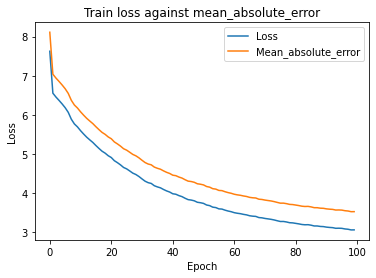

In [68]:
plt.title('Train loss against mean_absolute_error')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.plot(history.history['loss'])
plt.plot(history.history['mean_absolute_error'])
plt.legend(['Loss', 'Mean_absolute_error'])

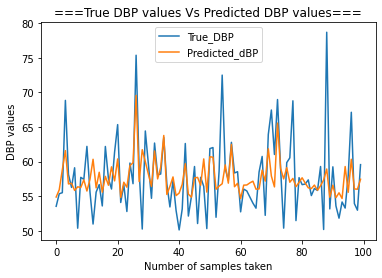

In [69]:
# Visualize predicted BP and the True BP
plt.title("===True DBP values Vs Predicted DBP values===")
plt.xlabel('Number of samples taken')
plt.ylabel('DBP values')
plt.plot(y_test[:100]) #only plotting 100 samples
plt.plot(val_predictions[:100])
plt.legend(['True_DBP', 'Predicted_dBP'])

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ecgb,sbpb, test_size=0.33)

In [71]:
input_dim = X_train.shape[1]
activation = 'relu'
classes = 1
model = Model(input_dim=input_dim, activation=activation, num_class=classes)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1024)              123904    
                                                                 
 activation_12 (Activation)  (None, 1024)              0         
                                                                 
 dropout_9 (Dropout)         (None, 1024)              0         
                                                                 
 dense_13 (Dense)            (None, 512)               524800    
                                                                 
 activation_13 (Activation)  (None, 512)               0         
                                                                 
 dropout_10 (Dropout)        (None, 512)               0         
                                                                 
 dense_14 (Dense)            (None, 64)               

In [72]:
history = model.fit(X_train, # using the first 1million rows for speed.
                    y_train.squeeze(),
                    epochs=100,
                    batch_size=128,
                    verbose = 1
                   )

Epoch 1/100
1029/1029 [==============================] - 9s 8ms/step - loss: 20.0758 - mean_absolute_error: 20.5698
Epoch 2/100
1029/1029 [==============================] - 9s 9ms/step - loss: 16.4705 - mean_absolute_error: 16.9640
Epoch 3/100
1029/1029 [==============================] - 8s 8ms/step - loss: 16.4191 - mean_absolute_error: 16.9125
Epoch 4/100
1029/1029 [==============================] - 8s 8ms/step - loss: 16.3554 - mean_absolute_error: 16.8487
Epoch 5/100
1029/1029 [==============================] - 9s 9ms/step - loss: 16.2899 - mean_absolute_error: 16.7831
Epoch 6/100
1029/1029 [==============================] - 8s 8ms/step - loss: 16.1717 - mean_absolute_error: 16.6651
Epoch 7/100
1029/1029 [==============================] - 8s 8ms/step - loss: 16.1121 - mean_absolute_error: 16.6052
Epoch 8/100
1029/1029 [==============================] - 8s 8ms/step - loss: 16.0054 - mean_absolute_error: 16.4985
Epoch 9/100
1029/1029 [==============================] - 8s 8ms/step - l

In [73]:
#Predicting on the test set using the nn(neural network) model
val_predictions = model.predict(X_test)
error = rmse(y_test, val_predictions)
print(f'Neural Net RMSE: {error}')

2027/2027 [==============================] - 4s 2ms/step
Neural Net RMSE: 10.745985247730248


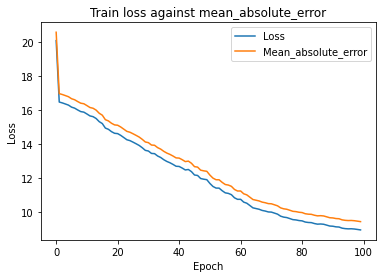

In [74]:
plt.title('Train loss against mean_absolute_error')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.plot(history.history['loss'])
plt.plot(history.history['mean_absolute_error'])
plt.legend(['Loss', 'Mean_absolute_error'])

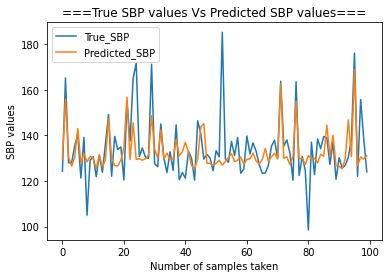

In [77]:
# Visualize predicted BP and the True BP
plt.title("===True SBP values Vs Predicted SBP values===")
plt.xlabel('Number of samples taken')
plt.ylabel('SBP values')
plt.plot(y_test[:100]) #only plotting 100 samples
plt.plot(val_predictions[:100])
plt.legend(['True_SBP', 'Predicted_SBP'])

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ecgb,dbpb, test_size=0.33)

In [79]:
input_dim = X_train.shape[1]
activation = 'relu'
classes = 1
model = Model(input_dim=input_dim, activation=activation, num_class=classes)
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 1024)              123904    
                                                                 
 activation_16 (Activation)  (None, 1024)              0         
                                                                 
 dropout_12 (Dropout)        (None, 1024)              0         
                                                                 
 dense_17 (Dense)            (None, 512)               524800    
                                                                 
 activation_17 (Activation)  (None, 512)               0         
                                                                 
 dropout_13 (Dropout)        (None, 512)               0         
                                                                 
 dense_18 (Dense)            (None, 64)               

In [80]:
history = model.fit(X_train, # using the first 1million rows for speed.
                    y_train.squeeze(),
                    epochs=100,
                    batch_size=128,
                    verbose = 1
                   )

Epoch 1/100
1029/1029 [==============================] - 8s 7ms/step - loss: 12.5685 - mean_absolute_error: 13.0598
Epoch 2/100
1029/1029 [==============================] - 9s 8ms/step - loss: 10.8587 - mean_absolute_error: 11.3495
Epoch 3/100
1029/1029 [==============================] - 8s 8ms/step - loss: 10.7849 - mean_absolute_error: 11.2753
Epoch 4/100
1029/1029 [==============================] - 8s 8ms/step - loss: 10.7244 - mean_absolute_error: 11.2151
Epoch 5/100
1029/1029 [==============================] - 8s 8ms/step - loss: 10.5520 - mean_absolute_error: 11.0423
Epoch 6/100
1029/1029 [==============================] - 8s 8ms/step - loss: 10.4275 - mean_absolute_error: 10.9176
Epoch 7/100
1029/1029 [==============================] - 8s 8ms/step - loss: 10.2378 - mean_absolute_error: 10.7276
Epoch 8/100
1029/1029 [==============================] - 8s 8ms/step - loss: 10.0879 - mean_absolute_error: 10.5775
Epoch 9/100
1029/1029 [==============================] - 8s 8ms/step - l

In [81]:
#Predicting on the test set using the nn(neural network) model
val_predictions = model.predict(X_test)
error = rmse(y_test, val_predictions)
print(f'Neural Net RMSE: {error}')

2027/2027 [==============================] - 5s 2ms/step
Neural Net RMSE: 8.13407420841933


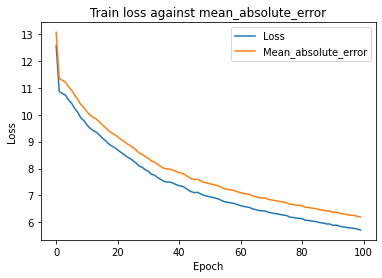

In [82]:
plt.title('Train loss against mean_absolute_error')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.plot(history.history['loss'])
plt.plot(history.history['mean_absolute_error'])
plt.legend(['Loss', 'Mean_absolute_error'])

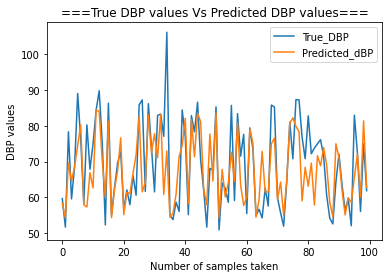

In [83]:
# Visualize predicted BP and the True BP
plt.title("===True DBP values Vs Predicted DBP values===")
plt.xlabel('Number of samples taken')
plt.ylabel('DBP values')
plt.plot(y_test[:100]) #only plotting 100 samples
plt.plot(val_predictions[:100])
plt.legend(['True_DBP', 'Predicted_dBP'])

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ecgc,sbpc, test_size=0.33)

In [85]:
input_dim = X_train.shape[1]
activation = 'relu'
classes = 1
model = Model(input_dim=input_dim, activation=activation, num_class=classes)
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 1024)              123904    
                                                                 
 activation_20 (Activation)  (None, 1024)              0         
                                                                 
 dropout_15 (Dropout)        (None, 1024)              0         
                                                                 
 dense_21 (Dense)            (None, 512)               524800    
                                                                 
 activation_21 (Activation)  (None, 512)               0         
                                                                 
 dropout_16 (Dropout)        (None, 512)               0         
                                                                 
 dense_22 (Dense)            (None, 64)               

In [86]:
history = model.fit(X_train, # using the first 1million rows for speed.
                    y_train.squeeze(),
                    epochs=100,
                    batch_size=128,
                    verbose = 1
                   )

Epoch 1/100
2122/2122 [==============================] - 18s 8ms/step - loss: 19.6462 - mean_absolute_error: 20.1404
Epoch 2/100
2122/2122 [==============================] - 16s 8ms/step - loss: 17.6013 - mean_absolute_error: 18.0952
Epoch 3/100
2122/2122 [==============================] - 16s 8ms/step - loss: 17.4622 - mean_absolute_error: 17.9562
Epoch 4/100
2122/2122 [==============================] - 16s 7ms/step - loss: 17.2949 - mean_absolute_error: 17.7890
Epoch 5/100
2122/2122 [==============================] - 16s 7ms/step - loss: 17.1961 - mean_absolute_error: 17.6901
Epoch 6/100
2122/2122 [==============================] - 16s 7ms/step - loss: 17.0268 - mean_absolute_error: 17.5206
Epoch 7/100
2122/2122 [==============================] - 17s 8ms/step - loss: 16.8952 - mean_absolute_error: 17.3890
Epoch 8/100
2122/2122 [==============================] - 17s 8ms/step - loss: 16.6595 - mean_absolute_error: 17.1533
Epoch 9/100
2122/2122 [==============================] - 16s 8ms

In [87]:
#Predicting on the test set using the nn(neural network) model
val_predictions = model.predict(X_test)
error = rmse(y_test, val_predictions)
print(f'Neural Net RMSE: {error}')

4181/4181 [==============================] - 9s 2ms/step
Neural Net RMSE: 11.185960777543254


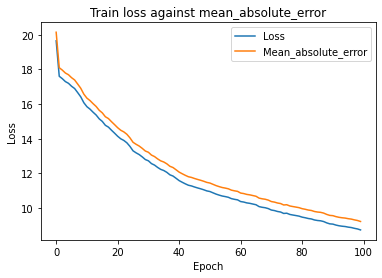

In [88]:
plt.title('Train loss against mean_absolute_error')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.plot(history.history['loss'])
plt.plot(history.history['mean_absolute_error'])
plt.legend(['Loss', 'Mean_absolute_error'])

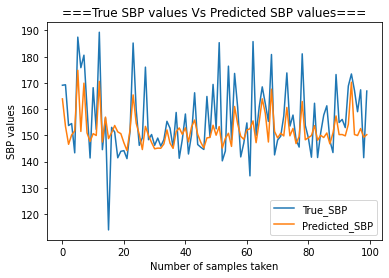

In [89]:
# Visualize predicted BP and the True BP
plt.title("===True SBP values Vs Predicted SBP values===")
plt.xlabel('Number of samples taken')
plt.ylabel('SBP values')
plt.plot(y_test[:100]) #only plotting 100 samples
plt.plot(val_predictions[:100])
plt.legend(['True_SBP', 'Predicted_SBP'])

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ecgc,dbpc, test_size=0.33)

In [91]:
input_dim = X_train.shape[1]
activation = 'relu'
classes = 1
model = Model(input_dim=input_dim, activation=activation, num_class=classes)
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 1024)              123904    
                                                                 
 activation_24 (Activation)  (None, 1024)              0         
                                                                 
 dropout_18 (Dropout)        (None, 1024)              0         
                                                                 
 dense_25 (Dense)            (None, 512)               524800    
                                                                 
 activation_25 (Activation)  (None, 512)               0         
                                                                 
 dropout_19 (Dropout)        (None, 512)               0         
                                                                 
 dense_26 (Dense)            (None, 64)               

In [92]:
history = model.fit(X_train, # using the first 1million rows for speed.
                    y_train.squeeze(),
                    epochs=100,
                    batch_size=128,
                    verbose = 1
                   )

Epoch 1/100
2122/2122 [==============================] - 17s 8ms/step - loss: 12.1208 - mean_absolute_error: 12.6117
Epoch 2/100
2122/2122 [==============================] - 16s 8ms/step - loss: 11.0727 - mean_absolute_error: 11.5631
Epoch 3/100
2122/2122 [==============================] - 16s 8ms/step - loss: 10.8620 - mean_absolute_error: 11.3522
Epoch 4/100
2122/2122 [==============================] - 16s 8ms/step - loss: 10.6876 - mean_absolute_error: 11.1774
Epoch 5/100
2122/2122 [==============================] - 16s 8ms/step - loss: 10.4641 - mean_absolute_error: 10.9540
Epoch 6/100
2122/2122 [==============================] - 16s 8ms/step - loss: 10.1662 - mean_absolute_error: 10.6555
Epoch 7/100
2122/2122 [==============================] - 16s 8ms/step - loss: 9.8991 - mean_absolute_error: 10.3881
Epoch 8/100
2122/2122 [==============================] - 16s 8ms/step - loss: 9.6933 - mean_absolute_error: 10.1819
Epoch 9/100
2122/2122 [==============================] - 16s 8ms/s

In [93]:
#Predicting on the test set using the nn(neural network) model
val_predictions = model.predict(X_test)
error = rmse(y_test, val_predictions)
print(f'Neural Net RMSE: {error}')

4181/4181 [==============================] - 9s 2ms/step
Neural Net RMSE: 8.85719609788793


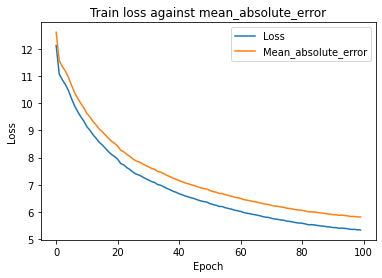

In [94]:
plt.title('Train loss against mean_absolute_error')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.plot(history.history['loss'])
plt.plot(history.history['mean_absolute_error'])
plt.legend(['Loss', 'Mean_absolute_error'])

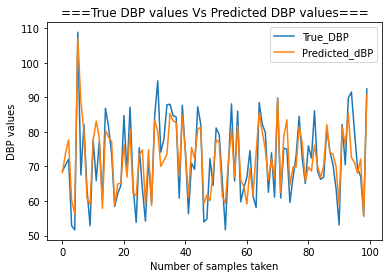

In [95]:
# Visualize predicted BP and the True BP
plt.title("===True DBP values Vs Predicted DBP values===")
plt.xlabel('Number of samples taken')
plt.ylabel('DBP values')
plt.plot(y_test[:100]) #only plotting 100 samples
plt.plot(val_predictions[:100])
plt.legend(['True_DBP', 'Predicted_dBP'])